In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
train.isnull().sum()

id                                0
price                             0
description                       2
neighborhood_overview           410
host_since                        0
host_location                   637
host_response_time              131
host_response_rate              131
host_acceptance_rate             89
host_is_superhost                 0
host_neighbourhood             1556
host_listings_count               0
host_verifications                0
host_identity_verified            0
neighbourhood                   409
neighbourhood_cleansed            0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
bedrooms                        268
beds                             21
amenities                         0
minimum_nights                    0
maximum_nights                    0
number_of_reviews                 0
review_scores_rating        

In [ ]:
clean_train = train.copy()
clean_test = test.copy()

In [ ]:
clean_train['logprice']=np.log(clean_train['price'])
clean_train = clean_train.drop('price', axis=1)

In [ ]:
dropcolumns = ['description','host_since','neighborhood_overview','host_location','host_neighbourhood','neighbourhood','neighbourhood_cleansed','property_type']

In [ ]:
clean_train = clean_train.drop(dropcolumns, axis=1)
clean_test = clean_test.drop(dropcolumns, axis=1)
clean_train

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_verifications,host_identity_verified,latitude,longitude,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,logprice
0,2000,within a few hours,100%,75%,f,1.0,"['email', 'phone']",f,-33.98233,151.23618,...,5.00,5.00,5.00,4.75,5.00,4.75,5.00,f,0.40,4.836282
1,2001,within an hour,100%,94%,f,32.0,"['email', 'phone']",t,-33.87019,151.19422,...,4.07,4.36,3.64,4.57,4.57,4.86,3.93,f,4.67,5.513429
2,2002,within an hour,100%,98%,t,2.0,"['email', 'phone']",t,-33.90163,151.21198,...,4.94,4.96,4.96,4.86,4.98,4.86,4.90,t,4.86,5.099866
3,2003,NaN,NaN,100%,f,1.0,"['email', 'phone']",t,-33.89327,151.25463,...,5.00,5.00,4.50,5.00,5.00,5.00,5.00,t,0.06,6.163315
4,2004,within an hour,100%,97%,f,2.0,"['email', 'phone']",t,-33.86902,151.20504,...,4.74,4.85,4.82,4.49,4.73,4.98,4.69,t,5.75,5.572154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,5995,within a few hours,100%,49%,f,1.0,"['email', 'phone']",f,-33.89289,151.27077,...,5.00,5.00,5.00,5.00,5.00,5.00,4.83,f,0.63,6.908755
3996,5996,within an hour,98%,93%,f,10.0,"['email', 'phone']",t,-33.93403,151.15383,...,4.60,4.70,4.70,4.85,4.70,4.80,4.55,f,1.88,4.890349
3997,5997,within an hour,95%,71%,f,68.0,"['email', 'phone', 'work_email']",t,-33.89061,151.28271,...,4.79,4.84,4.84,5.00,4.95,5.00,4.84,f,0.49,5.017280
3998,5998,NaN,NaN,100%,f,2.0,"['email', 'phone']",t,-33.95479,151.03370,...,4.60,4.59,4.49,4.77,4.84,4.53,4.66,f,1.02,3.555348


In [ ]:
clean_train['host_response_time'] = clean_train['host_response_time'].fillna('NA')
clean_test['host_response_time'] = clean_test['host_response_time'].fillna('NA')
clean_train['host_response_time'].value_counts()

within an hour        2745
within a few hours     641
within a day           352
NA                     131
a few days or more     131
Name: host_response_time, dtype: int64

In [ ]:
host_response_time_cate = {
    "within an hour":1,
    "within a few hours":2,
    "within a day":3,
    "NA":5,
    "a few days or more":4.   
}
clean_train['host_response_time'] = clean_train['host_response_time'].replace(host_response_time_cate).astype(int)
clean_test['host_response_time'] = clean_test['host_response_time'].replace(host_response_time_cate).astype(int)

In [ ]:
clean_train['host_response_rate'] = clean_train['host_response_rate'].str.replace('%','')
clean_train['host_response_rate'] = clean_train['host_response_rate'].fillna(100)
clean_train['host_response_rate'] = clean_train['host_response_rate'].astype(int)

clean_test['host_response_rate'] = clean_test['host_response_rate'].str.replace('%','')
clean_test['host_response_rate'] = clean_test['host_response_rate'].fillna(100)
clean_test['host_response_rate'] = clean_test['host_response_rate'].astype(int)

In [ ]:
clean_train['host_acceptance_rate'] = clean_train['host_acceptance_rate'].str.replace('%','')
clean_train['host_acceptance_rate'] = clean_train['host_acceptance_rate'].fillna(0)
clean_train['host_acceptance_rate'] = clean_train['host_acceptance_rate'].astype(int)

clean_test['host_acceptance_rate'] = clean_test['host_acceptance_rate'].str.replace('%','')
clean_test['host_acceptance_rate'] = clean_test['host_acceptance_rate'].fillna(0)
clean_test['host_acceptance_rate'] = clean_test['host_acceptance_rate'].astype(int)

In [ ]:
clean_train['room_type'].value_counts()

Entire home/apt    3203
Private room        727
Hotel room           60
Shared room          10
Name: room_type, dtype: int64

In [ ]:
room_cate = {
    "Entire home/apt":1,
    "Private room":2,
    "Hotel room":3,
    "Shared room":4.   
}
clean_train['room_type'] = clean_train['room_type'].replace(room_cate).astype(int)
clean_test['room_type'] = test['room_type'].replace(room_cate).astype(int)
clean_train['room_type']

0       2
1       1
2       1
3       1
4       1
       ..
3995    2
3996    1
3997    1
3998    2
3999    1
Name: room_type, Length: 4000, dtype: int32

In [ ]:
clean_train['beds'].fillna(clean_train['accommodates'],inplace=True)
clean_train['bedrooms'].fillna(clean_train['beds'],inplace=True)

clean_test['beds'].fillna(clean_test['accommodates'],inplace=True)
clean_test['bedrooms'].fillna(clean_test['beds'],inplace=True)

In [ ]:
clean_train.isnull().sum()

id                             0
host_response_time             0
host_response_rate             0
host_acceptance_rate           0
host_is_superhost              0
host_listings_count            0
host_verifications             0
host_identity_verified         0
latitude                       0
longitude                      0
room_type                      0
accommodates                   0
bedrooms                       0
beds                           0
amenities                      0
minimum_nights                 0
maximum_nights                 0
number_of_reviews              0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
instant_bookable               0
reviews_per_month              0
logprice                       0
dtype: int64

In [ ]:
amen= []
for i in range(train.shape[0]):
    amen.append(len(clean_train.iloc[i,14].split(',')))
clean_train['amenities'] = amen

amen= []
for i in range(test.shape[0]):
    amen.append(len(clean_test.iloc[i,14].split(',')))
clean_test['amenities'] = amen

clean_train['amenities']

0       30
1       40
2       41
3       33
4       32
        ..
3995    43
3996    14
3997    18
3998    31
3999    39
Name: amenities, Length: 4000, dtype: int64

In [ ]:
number_verifi = []
for i in range(train.shape[0]):
    number_verifi.append(len(clean_train.iloc[i,6].split(',')))
clean_train['host_verifications'] = number_verifi

number_verifi = []
for i in range(test.shape[0]):
    number_verifi.append(len(clean_test.iloc[i,6].split(',')))
clean_test['host_verifications'] = number_verifi

clean_train['host_verifications']

0       2
1       2
2       2
3       2
4       2
       ..
3995    2
3996    2
3997    3
3998    2
3999    2
Name: host_verifications, Length: 4000, dtype: int64

In [ ]:
location = []
for i in range(clean_train.shape[0]):
    benchmark = np.array([-33.870453, 151.208755])
    lat_long = np.array([clean_train.iloc[i,8],clean_train.iloc[i,9]])
    distance = np.linalg.norm(lat_long-benchmark)
    location.append(distance)
clean_train['Distance'] = location

location = []
for i in range(clean_test.shape[0]):
    benchmark = np.array([-33.870453, 151.208755])
    lat_long = np.array([clean_test.iloc[i,8],clean_test.iloc[i,9]])
    distance = np.linalg.norm(lat_long-benchmark)
    location.append(distance)
clean_test['Distance'] = location

In [ ]:
clean_train[['instant_bookable','host_identity_verified','host_is_superhost']] = pd.get_dummies(clean_train[['instant_bookable','host_identity_verified','host_is_superhost']], drop_first=True)
clean_test[['instant_bookable','host_identity_verified','host_is_superhost']] = pd.get_dummies(clean_test[['instant_bookable','host_identity_verified','host_is_superhost']], drop_first=True)

In [ ]:
move_logprice = clean_train.pop('logprice')
clean_train['logprice']=move_logprice

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_verifications,host_identity_verified,latitude,longitude,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,Distance,logprice
0,2000,2,100,75,0,1.0,2,0,-33.98233,151.23618,...,5.00,5.00,4.75,5.00,4.75,5.00,0,0.40,0.115189,4.836282
1,2001,1,100,94,0,32.0,2,1,-33.87019,151.19422,...,4.36,3.64,4.57,4.57,4.86,3.93,0,4.67,0.014537,5.513429
2,2002,1,100,98,1,2.0,2,1,-33.90163,151.21198,...,4.96,4.96,4.86,4.98,4.86,4.90,1,4.86,0.031343,5.099866
3,2003,5,100,100,0,1.0,2,1,-33.89327,151.25463,...,5.00,4.50,5.00,5.00,5.00,5.00,1,0.06,0.051236,6.163315
4,2004,1,100,97,0,2.0,2,1,-33.86902,151.20504,...,4.85,4.82,4.49,4.73,4.98,4.69,1,5.75,0.003982,5.572154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,5995,2,100,49,0,1.0,2,0,-33.89289,151.27077,...,5.00,5.00,5.00,5.00,5.00,4.83,0,0.63,0.065949,6.908755
3996,5996,1,98,93,0,10.0,2,1,-33.93403,151.15383,...,4.70,4.70,4.85,4.70,4.80,4.55,0,1.88,0.084017,4.890349
3997,5997,1,95,71,0,68.0,3,1,-33.89061,151.28271,...,4.84,4.84,5.00,4.95,5.00,4.84,0,0.49,0.076653,5.017280
3998,5998,5,100,100,0,2.0,2,1,-33.95479,151.03370,...,4.59,4.49,4.77,4.84,4.53,4.66,0,1.02,0.194312,3.555348


In [ ]:
clean_train.corr()['logprice'].sort_values()

room_type                     -0.477595
number_of_reviews             -0.132850
instant_bookable              -0.112784
reviews_per_month             -0.107699
minimum_nights                -0.075969
review_scores_value           -0.042912
host_acceptance_rate          -0.041329
maximum_nights                -0.019390
id                            -0.012651
host_is_superhost             -0.012549
Distance                       0.028261
host_identity_verified         0.035507
host_response_time             0.047109
host_response_rate             0.061510
review_scores_checkin          0.065444
review_scores_communication    0.066086
host_verifications             0.075365
review_scores_accuracy         0.081060
host_listings_count            0.092621
review_scores_cleanliness      0.097975
review_scores_rating           0.132451
amenities                      0.198743
review_scores_location         0.218745
latitude                       0.219251
longitude                      0.323453


<AxesSubplot:>

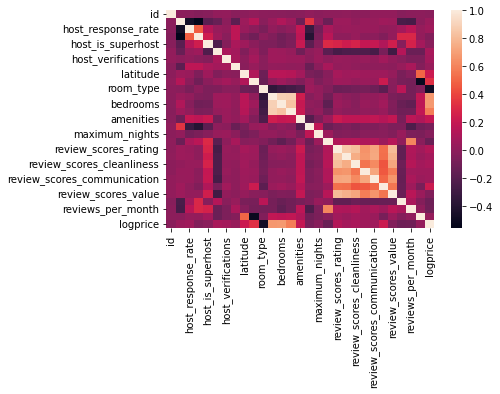

In [ ]:
#top_10 = clean_train.corr().index(10)
#sns.heatmap(top_10)
sns.heatmap(clean_train.corr())